CC Cet has some archival UVES spectra that ESO has processed! Let's have a look.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path =  '/media/david/5tb_storage1/cc_cet_uves/'


In [3]:
specs = glob.glob('{}archive/*.fits'.format(path))
specs

['/media/david/5tb_storage1/cc_cet_uves/archive/ADP.2017-10-24T06:58:34.278.fits',
 '/media/david/5tb_storage1/cc_cet_uves/archive/ADP.2017-10-24T06:58:34.285.fits',
 '/media/david/5tb_storage1/cc_cet_uves/archive/ADP.2017-10-24T07:00:23.596.fits',
 '/media/david/5tb_storage1/cc_cet_uves/archive/ADP.2017-10-24T07:00:23.601.fits']

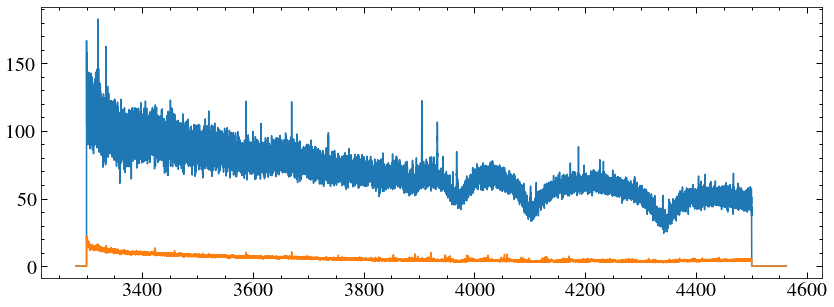

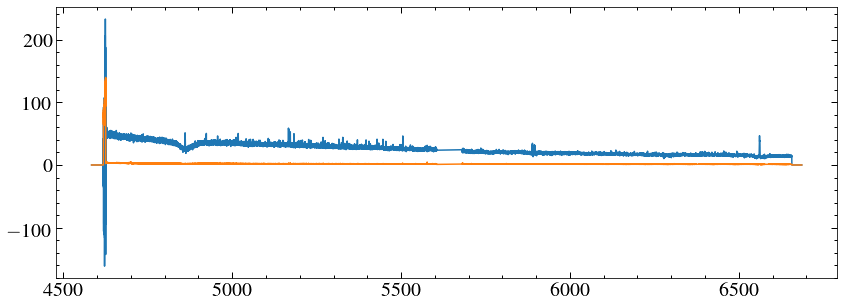

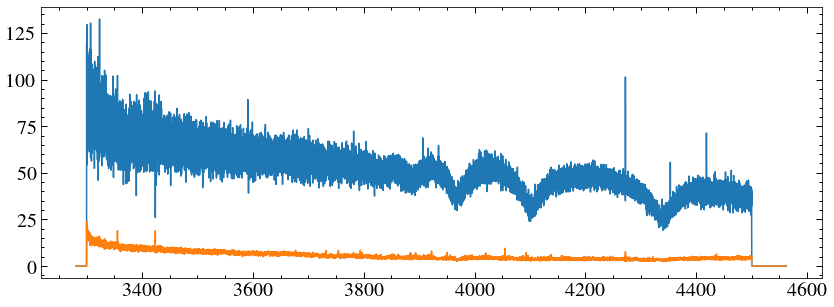

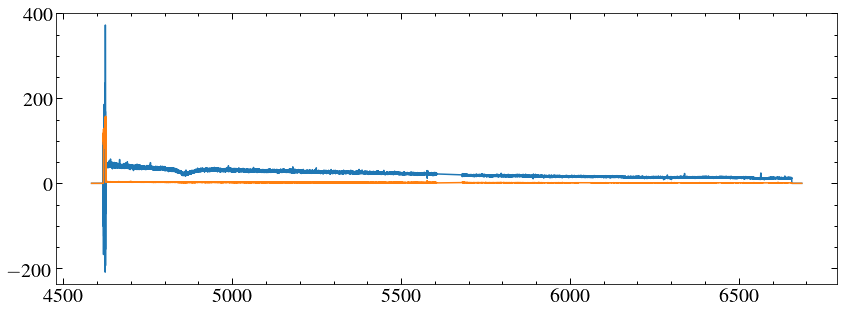

In [13]:
for spec in specs:
    data = fits.getdata(spec, 1)[0]
    #print(data.names)
    plt.plot(data['WAVE'], data['FLUX'])
    plt.plot(data['WAVE'], data['ERR'])
    plt.show()
    #print(data)

In [14]:
hdul = fits.open(specs[0])

In [15]:
hdul.info()

Filename: /media/david/5tb_storage1/cc_cet_uves/archive/ADP.2017-10-24T06:58:34.278.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     562   ()      
  1  SPECTRUM      1 BinTableHDU     71   1R x 6C   [47177E, 47177E, 47177E, 47177E, 47177E, 47177E]   


In [54]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =              1132248 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'WAVE    '                                                            
TFORM1  = '47177E  '                                                            
TTYPE2  = 'FLUX_REDUCED'                                                        
TFORM2  = '47177E  '                                                            
TTYPE3  = 'ERR_REDUCED'     

2001-02-07T01:27:44.233


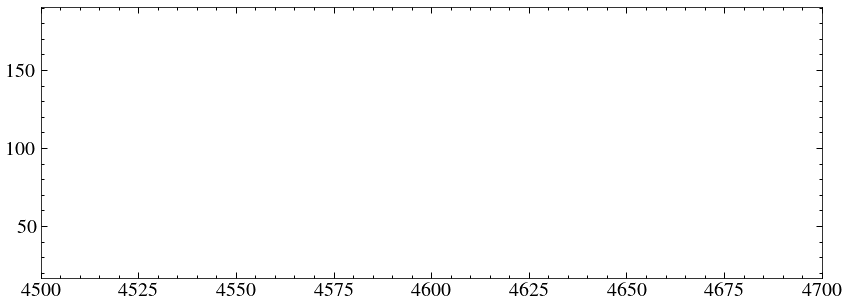

2001-02-07T01:27:42.810


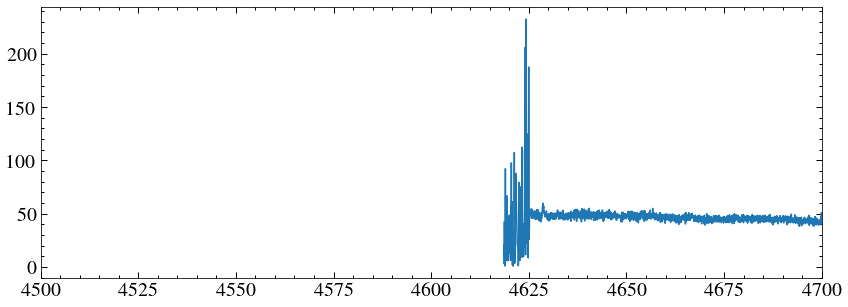

2001-02-08T01:36:22.407


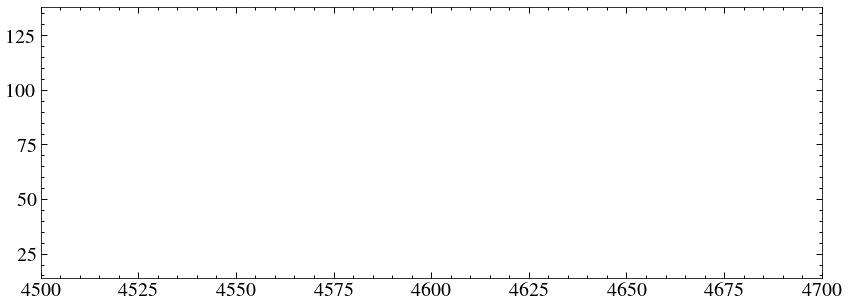

2001-02-08T01:36:21.194


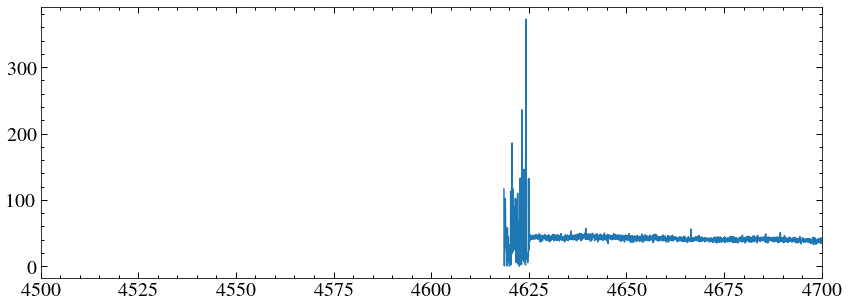

In [53]:
smooth = 10
for spec in specs:
    date = fits.getheader(spec, 0)['DATE-OBS']
    print(date)
    data = fits.getdata(spec, 1)[0]
    w, f, e = data['WAVE'], data['FLUX'], data['ERR']
    mask =  (f > 0)
    w, f, e = w[mask], f[mask], e[mask]
   # f = convolve(f,Box1DKernel(smooth))
    
  #  clip = 50
   #w, f, e = w[clip:-clip], f[clip:-clip], e[clip:-clip]
    plt.plot(w,f)
   #if w[-1] < 5000:
  #      plt.xlim(3900, 3970)
   # else:
    #    plt.xlim(6000, 7000)
    plt.xlim(4500, 4700)
    plt.show()

In [47]:
dates = []
for spec in specs:
    date = fits.getheader(spec, 0)['DATE-OBS']
    dates.append(date[:date.find('T')])
dates = np.unique(np.array(dates))
print (dates)

['2001-02-07' '2001-02-08']


2001-02-07


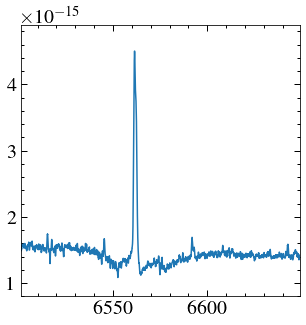

2001-02-08


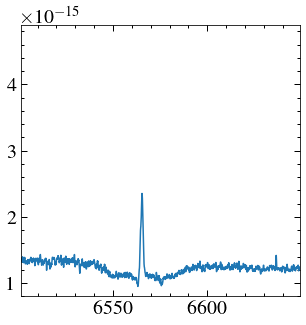

In [70]:
for date in dates:
    print(date)
    plt.figure(figsize=(5,5))
    w, f, e = np.array([], dtype=float), np.array([], dtype=float), np.array([], dtype=float)
    for spec in specs:
        datei = fits.getheader(spec, 0)['DATE-OBS']
        #print(datei)
        if datei[:datei.find('T')] == date:
            data = fits.getdata(spec, 1)[0]
            wi, fi, ei = data['WAVE'], data['FLUX'], data['ERR']
            mask =  (fi > 0)
            wi, fi, ei = wi[mask], fi[mask], ei[mask]
            if wi[0] > 4000:
                mask =  (wi > 4630)
                wi, fi, ei = wi[mask], fi[mask], ei[mask]
            w = np.concatenate((w, wi))
            f = np.concatenate((f, fi*1e-16))
            e = np.concatenate((e, ei*1e-16))
    f = convolve(f,Box1DKernel(smooth))
    plt.plot(w, f)
   # plt.plot(w, e)
   # savdat = Table([w, f, e], names=['#WAVELENGTH', 'FLUX', 'ERROR'])
    #ascii.write(savdat, '{}cc_cet_uves_{}.dat'.format(path, date), format='basic', overwrite=True)
    plt.xlim(6501,6649)
    plt.ylim(0.8e-15, 4.9e-15)
   # plt.show()

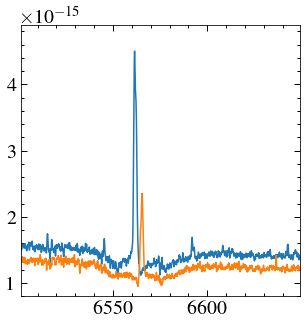

In [72]:
dats = glob.glob('{}/*.dat'.format(path))
plt.figure(figsize=(5,5))
for dat in dats:
    w, f, e = np.loadtxt(dat, unpack=True)
    
    f = convolve(f,Box1DKernel(smooth))
    plt.plot(w, f)
   # plt.plot(w, e)
   # savdat = Table([w, f, e], names=['#WAVELENGTH', 'FLUX', 'ERROR'])
    #ascii.write(savdat, '{}cc_cet_uves_{}.dat'.format(path, date), format='basic', overwrite=True)
    plt.xlim(6501,6649)
    plt.ylim(0.8e-15, 4.9e-15)
   # plt.show()

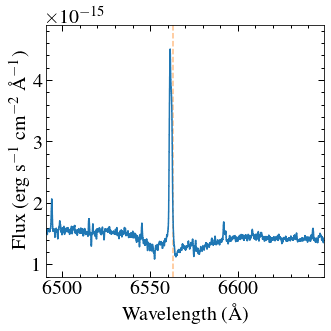

In [84]:
from matplotlib.animation import FuncAnimation



from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(5,5))
fig.set_tight_layout(True)

#ax[0].plot(t, f_lc)
#ax[0].set_xlabel('Time (s)')
#ax[0].set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$)')
#ax[0].set_ylim(0.4, 1.2)
ax.set_xlim(6491, 6649)
ax.set_ylim(0.8e-15, 4.9e-15)

#line, = ax[0].plot([0,0], [-0.1e-12,1.3e-12], 'C1--', linewidth=2)
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')
ax.axvline(6562.77, ls='--', c='C1', alpha=0.5)
#[ax[1].axvline(line, ls='--', c='r') for line in [8498.02,8542.09,8662.14]]


#ext = hdul[1::][0]
#dt = ext.data[0]
#w, f = dt['WAVELENGTH'], dt['FLUX']
w, f, e = np.array([], dtype=float), np.array([], dtype=float), np.array([], dtype=float)
#w, f, e  = np.loadtxt(csv_files[0], unpack=True, delimiter=',')
line1, = ax.step(w,f, where='mid')

def update(i):
    #time = t[i]
    #line.set_xdata([t[i], t[i]])
    #ext = hdul[1::][i]
    #dt = ext.data[0]
    w, f,e  = np.loadtxt(dats[i], unpack=True)
    f = convolve(f,Box1DKernel(smooth))
    line1.set_xdata(w)
    line1.set_ydata(f)
    return ax, line1

anim = FuncAnimation(fig, update, frames=np.arange(len(dats)), interval=500)
anim.save('test.gif', dpi=80, writer='imagemagick')
plt.show()

